In [69]:
# import the necessary lib
import perfplot
import numpy as np

In [48]:
perfplot.show(
    setup = np.random.rand,
    kernels = [
        lambda x: np.c_[x, x],
        lambda x: np.stack([x, x]).T,
        lambda x: np.vstack([x, x]).T,
        lambda x: np.column_stack([x, x]),
        lambda x: np.concatenate([x[:, None], x[:, None]], axis = 1)
    ],
    labels = ["C__", "np.stack", "np.vstack", "np.column_stack", "np.concatenate"],
    n_range = [2 ** k for k in range(25)],
    xlabel = "size of input"

)

NameError: name 'perfplot' is not defined

In [3]:
### requests with proxy play
import requests


In [155]:
proxy = {
    "http":  "socks5h://localhost:6000",
    "https": "socks5h://localhost:6000"
}

In [157]:
r = requests.get("https://baidu.com", proxies = proxy)
print(r.headers)
print(r.status_code)

{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Tue, 13 Dec 2022 21:36:06 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:28:11 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}
200


In [58]:
proxy2 = {
    "http":  "socks5h://localhost:7582",
    "https": "socks5h://localhost:7582"
}

In [64]:

r = requests.get("https://baidu.com", proxies = proxy2)
print(r.headers)
print(r.status_code)

{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Tue, 13 Dec 2022 02:11:59 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:28:12 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}
200


In [35]:
print(r.encoding)

utf-8


In [36]:
print(r.content)

b'{\n  "ip": "73.4.153.225",\n  "hostname": "c-73-4-153-225.hsd1.ma.comcast.net",\n  "city": "Somerville",\n  "region": "Massachusetts",\n  "country": "US",\n  "loc": "42.3907,-71.0929",\n  "org": "AS7015 Comcast Cable Communications, LLC",\n  "postal": "02145",\n  "timezone": "America/New_York",\n  "readme": "https://ipinfo.io/missingauth"\n}'


In [37]:
print(r.status_code)

200


In [38]:
r.raise_for_status()

In [40]:
r.headers['content-type']

'application/json; charset=utf-8'

In [42]:
r.headers

{'access-control-allow-origin': '*', 'x-frame-options': 'SAMEORIGIN', 'x-xss-protection': '1; mode=block', 'x-content-type-options': 'nosniff', 'referrer-policy': 'strict-origin-when-cross-origin', 'content-type': 'application/json; charset=utf-8', 'date': 'Tue, 13 Dec 2022 01:47:10 GMT', 'x-envoy-upstream-service-time': '2', 'strict-transport-security': 'max-age=2592000; includeSubDomains', 'vary': 'Accept-Encoding', 'content-encoding': 'gzip', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000', 'Transfer-Encoding': 'chunked'}

In [43]:
r.history

[]

In [ ]:
s = requests.Session()
s.proxies.update(proxy)
def go_proxy(num_iter):
    re_list = []
    for i in (num_iter):
        r = s.get("https://www.google.com")
        re_list.append(r.status_code)
    return re_list

def java_proxy(num_iter):
    re_list = []
    for i in (num_iter):
        r = requests.get("https://www.google.com", proxies = proxy2)
        re_list.append(r.status_code)
    return re_list

Output()

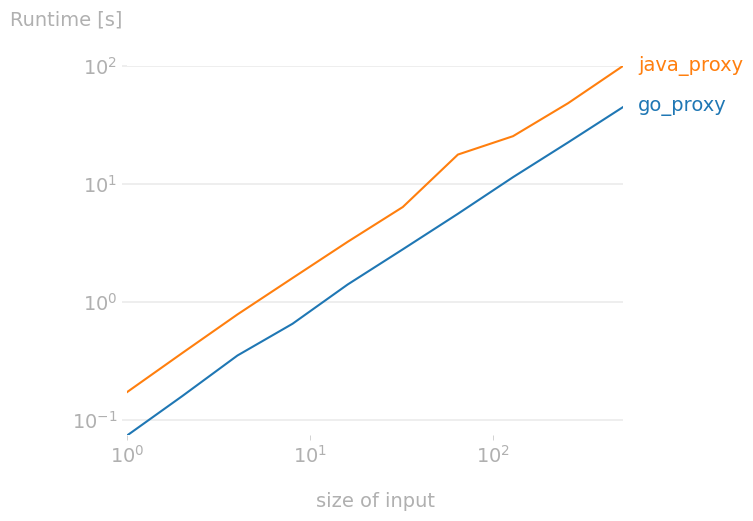

In [90]:
perfplot.show(
    setup = lambda n: list(range(n)),
    kernels = [
        go_proxy,
        java_proxy
    ],
    labels = ["go_proxy", "java_proxy"],
    n_range = [2 ** k for k in range(10)],
    xlabel = "size of input"

)

In [76]:
list(range(5))

[0, 1, 2, 3, 4]

In [91]:
import pandas as pd

In [92]:
top100 = pd.read_csv("/Users/peng/Downloads/top-1m.csv")

In [93]:
print(type(top100))

<class 'pandas.core.frame.DataFrame'>


In [94]:
top100

,1,google.com
0,2,youtube.com
1,3,facebook.com
2,4,baidu.com
3,5,bilibili.com
4,6,instagram.com
...,...,...
639076,639078,zafaah.com
639077,639079,zallom.com
639078,639080,zerovape.store
639079,639081,zfatt.com


In [98]:
top100.columns

Index(['1', 'google.com'], dtype='object')

In [100]:
top100.columns = ['idx', 'websites']

In [101]:
top100

,idx,websites
0,2,youtube.com
1,3,facebook.com
2,4,baidu.com
3,5,bilibili.com
4,6,instagram.com
...,...,...
639076,639078,zafaah.com
639077,639079,zallom.com
639078,639080,zerovape.store
639079,639081,zfatt.com


In [102]:
newtop100 = top100['websites'][:99]

In [103]:
newtop100

0           youtube.com
1          facebook.com
2             baidu.com
3          bilibili.com
4         instagram.com
            ...        
94              nih.gov
95    sciencedirect.com
96               msn.cn
97           tumblr.com
98             cnki.net
Name: websites, Length: 99, dtype: object

In [109]:
newtop100.loc[99] = "google.com"

In [110]:
newtop100

0           youtube.com
1          facebook.com
2             baidu.com
3          bilibili.com
4         instagram.com
            ...        
95    sciencedirect.com
96               msn.cn
97           tumblr.com
98             cnki.net
99           google.com
Name: websites, Length: 100, dtype: object

### socket

In [111]:
import socket

In [151]:
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

In [152]:
s.connect(("localhost", 7582))

In [153]:
s.send(b'\x050100')

5

In [154]:
r = s.recv(30)
print(r)

b'\x05\x00'


In [150]:
s.close()

In [128]:
print(b'\x41')

b'A'
